Proj_2 Analysis

Load Libraries:

In [652]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn import metrics 
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge
from scipy.stats import skew

%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 120)


Load Data:

In [653]:
comb_dum = pd.read_csv('../datasets/comb_dum.csv')

#### Feature Selection

In [654]:
comb_dum.describe().T

count          mean           std          min           25%          50%           75%           max
id                    2930.0  1.465500e+03  8.459625e+02          1.0  7.332500e+02       1465.5  2.197750e+03  2.930000e+03
pid                   2930.0  7.144645e+08  1.887308e+08  526301100.0  5.284770e+08  535453620.0  9.071811e+08  1.007100e+09
ms_subclass           2930.0  5.738737e+01  4.263802e+01         20.0  2.000000e+01         50.0  7.000000e+01  1.900000e+02
lot_frontage          2930.0  6.901980e+01  2.132642e+01         21.0  6.000000e+01         68.0  7.800000e+01  3.130000e+02
lot_area              2930.0  1.014792e+04  7.880018e+03       1300.0  7.440250e+03       9436.5  1.155525e+04  2.152450e+05
lot_shape             2930.0  2.597611e+00  5.702848e-01          0.0  2.000000e+00          3.0  3.000000e+00  3.000000e+00
utilities             2930.0  2.998635e+00  4.523954e-02          1.0  3.000000e+00          3.0  3.000000e+00  3.000000e+00
land_slope            2930.0  1.946416e+00  2.483042e-01          0.0  2.000000e+00          2.0  2.000000e+00  2.000000e+00
overall_qual          2930.0  6.094881e+00  1.411026e+00          1.0  5.000000e+00          6.0  7.000000e+00  1.000000e+01
overall_cond          2930.0  5.563140e+00  1.111537e+00          1.0  5.000000e+00          5.0  6.000000e+00  9.000000e+00
year_built            2930.0  1.971356e+03  3.024536e+01       1872.0  1.954000e+03       1973.0  2.001000e+03  2.010000e+03
year_remod_add        2930.0  1.984267e+03  2.086029e+01       1950.0  1.965000e+03       1993.0  2.004000e+03  2.010000e+03
mas_vnr_area          2930.0  1.010969e+02  1.786345e+02          0.0  0.000000e+00          0.0  1.627500e+02  1.600000e+03
exter_qual            2930.0  2.398635e+00  5.803175e-01          1.0  2.000000e+00          2.0  3.000000e+00  4.000000e+00
exter_cond            2930.0  2.085324e+00  3.716980e-01          0.0  2.000000e+00          2.0  2.000000e+00  4.000000e+00
bsmt_qual             2930.0  3.478840e+00  9.042950e-01          0.0  3.000000e+00          4.0  4.000000e+00  5.000000e+00
bsmt_cond             2930.0  2.922867e+00  5.726699e-01          0.0  3.000000e+00          3.0  3.000000e+00  5.000000e+00
bsmt_exposure         2930.0  1.629352e+00  1.075738e+00          0.0  1.000000e+00          1.0  2.000000e+00  4.000000e+00
bsmtfin_type_1        2930.0  3.548805e+00  2.115762e+00          0.0  1.000000e+00          4.0  6.000000e+00  6.000000e+00
bsmtfin_sf_1          2930.0  4.424785e+02  4.555865e+02          0.0  0.000000e+00        370.0  7.340000e+02  5.644000e+03
bsmtfin_type_2        2930.0  1.275085e+00  9.569571e-01          0.0  1.000000e+00          1.0  1.000000e+00  6.000000e+00
bsmtfin_sf_2          2930.0  4.970546e+01  1.691421e+02          0.0  0.000000e+00          0.0  0.000000e+00  1.526000e+03
bsmt_unf_sf           2930.0  5.590717e+02  4.395406e+02          0.0  2.190000e+02        465.5  8.017500e+02  2.336000e+03
total_bsmt_sf         2930.0  1.051256e+03  4.409680e+02          0.0  7.930000e+02        990.0  1.301500e+03  6.110000e+03
heating_qc            2930.0  3.149488e+00  9.580701e-01          0.0  2.000000e+00          4.0  4.000000e+00  4.000000e+00
electrical            2929.0  3.892113e+00  3.884904e-01          0.0  4.000000e+00          4.0  4.000000e+00  4.000000e+00
1st_flr_sf            2930.0  1.159558e+03  3.918909e+02        334.0  8.762500e+02       1084.0  1.384000e+03  5.095000e+03
2nd_flr_sf            2930.0  3.354560e+02  4.283957e+02          0.0  0.000000e+00          0.0  7.037500e+02  2.065000e+03
low_qual_fin_sf       2930.0  4.676792e+00  4.631051e+01          0.0  0.000000e+00          0.0  0.000000e+00  1.064000e+03
gr_liv_area           2930.0  1.499690e+03  5.055089e+02        334.0  1.126000e+03       1442.0  1.742750e+03  5.642000e+03
kitchen_qual          2930.0  2.511263e+00  6.631624e-01          0.0  2.000000e+00          2.0  3.000000e+00  4.000000e+00
totrms_abvgrd         2

In [655]:
def scatter_box(x,y):
    t=x.dropna()
    skew_value=skew(t)
    y=np.log1p(y)
    print('sample lengh: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(8,4))
    sns.regplot(x,y,ax=axs[0]) 
    sns.boxplot(x,orient='v',ax=axs[1])
    plt.tight_layout()

saleprice vs. lot_frontage

sample lengh: 2930   and skew: 1.6693484287391456


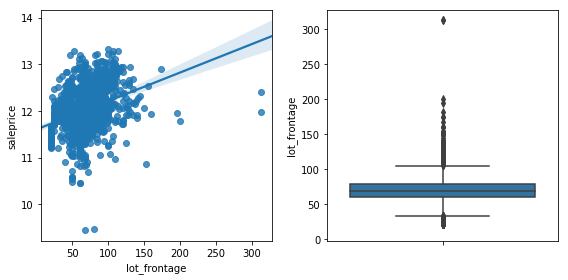

In [656]:
scatter_box(comb_dum.lot_frontage, comb_dum.saleprice)

In [657]:
#Exclude lot_frontage outliers > 250
comb_dum=comb_dum[comb_dum.lot_frontage<250]

saleprice vs. overall_qual

sample lengh: 2928   and skew: 0.1874021893769163


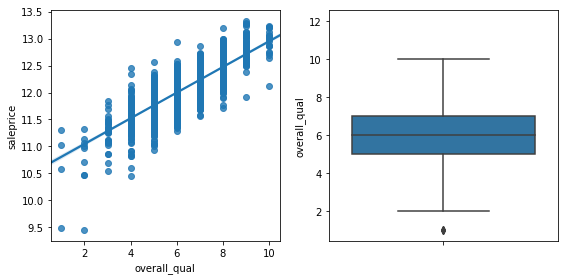

In [658]:
scatter_box(comb_dum.overall_qual, comb_dum.saleprice)

saleprice vs. overall_cond

sample lengh: 2928   and skew: 0.574618353370937


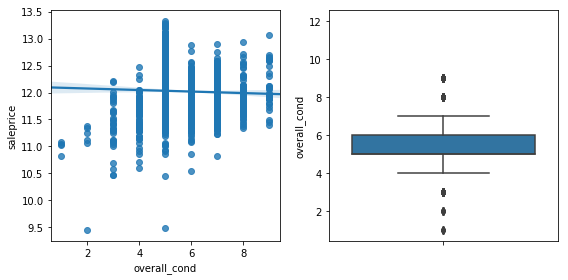

In [659]:
scatter_box(comb_dum.overall_cond, comb_dum.saleprice)

saleprice vs. 1st_flr_sf

sample lengh: 2928   and skew: 1.281647807676348


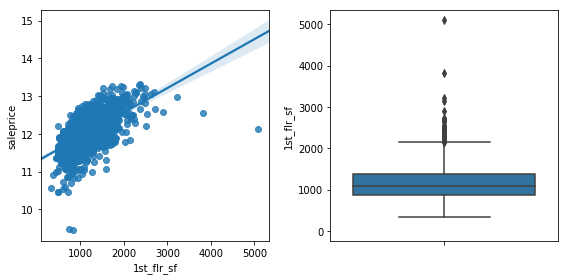

In [660]:
scatter_box(comb_dum['1st_flr_sf'], comb_dum.saleprice)

In [661]:
#Exclude 1st_flr_sf outliers > 3500
comb_dum=comb_dum[comb_dum['1st_flr_sf']<3500]

saleprice vs. 1st_flr_sf

sample lengh: 2926   and skew: 0.8656973305516446


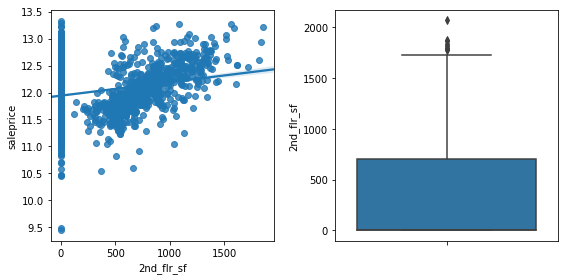

In [662]:
scatter_box(comb_dum['2nd_flr_sf'], comb_dum.saleprice)

saleprice vs. low_qual_fin_sf

sample lengh: 2926   and skew: 12.10352713514722


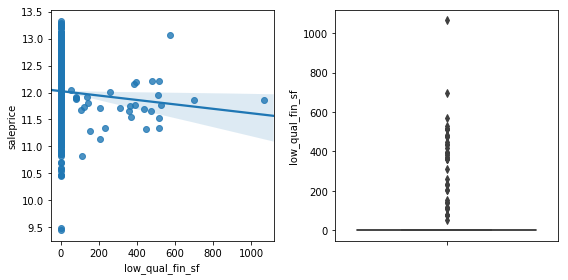

In [663]:
scatter_box(comb_dum.low_qual_fin_sf, comb_dum.saleprice)

In [664]:
#Exclude 1st_flr_sf low_qual_fin_sf > 800
comb_dum=comb_dum[comb_dum.low_qual_fin_sf<800]

saleprice vs. gr_liv_area

sample lengh: 2925   and skew: 1.02294182114007


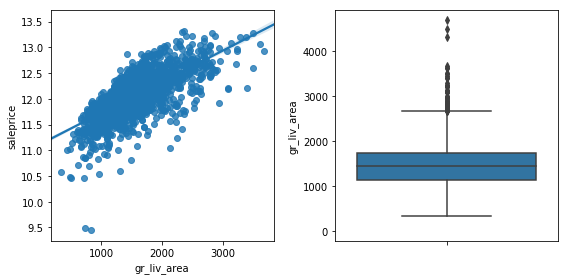

In [665]:
scatter_box(comb_dum.gr_liv_area, comb_dum.saleprice)

In [666]:
#Exclude gr_liv_area low_qual_fin_sf > 3800
comb_dum=comb_dum[comb_dum.gr_liv_area<3800]

saleprice vs. gr_liv_area

sample lengh: 2922   and skew: 1.8460889704237835


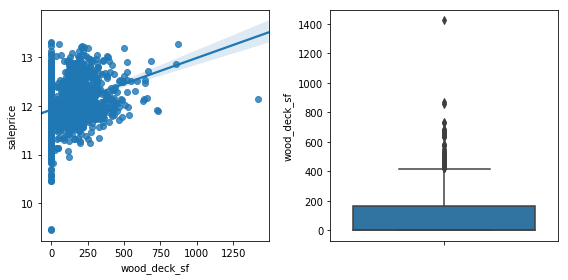

In [667]:
scatter_box(comb_dum.wood_deck_sf, comb_dum.saleprice)

In [668]:
#Exclude gr_liv_area wood_deck_sf > 1250
comb_dum=comb_dum[comb_dum.wood_deck_sf<1250]

saleprice vs. enclosed_porch

sample lengh: 2921   and skew: 4.006744138003463


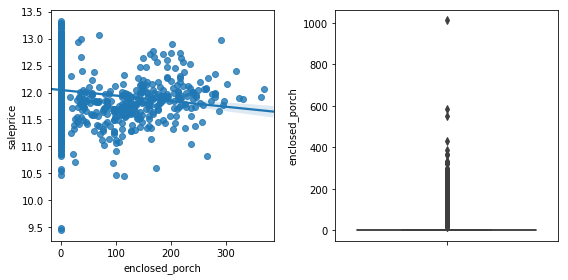

In [669]:
scatter_box(comb_dum.enclosed_porch, comb_dum.saleprice)

In [670]:
#Exclude enclosed_porch > 800
comb_dum=comb_dum[comb_dum.enclosed_porch<800]

saleprice vs. enclosed_porch

sample lengh: 2920   and skew: 2.4923044001147936


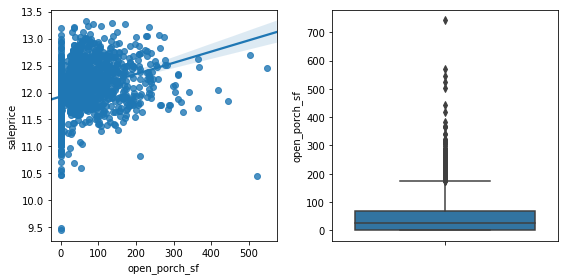

In [671]:
scatter_box(comb_dum.open_porch_sf, comb_dum.saleprice)

In [672]:
#Exclude enclosed_porch > 600
comb_dum=comb_dum[comb_dum.enclosed_porch<600]

saleprice vs. 3ssn_porch

sample lengh: 2920   and skew: 11.378056534498107


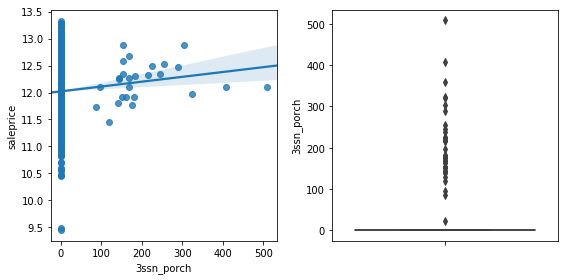

In [673]:
scatter_box(comb_dum['3ssn_porch'], comb_dum.saleprice)

In [674]:
#Exclude 3ssn_porch > 450
comb_dum=comb_dum[comb_dum['3ssn_porch']<450]

saleprice vs. screen_porch

sample lengh: 2919   and skew: 3.9466937029936977


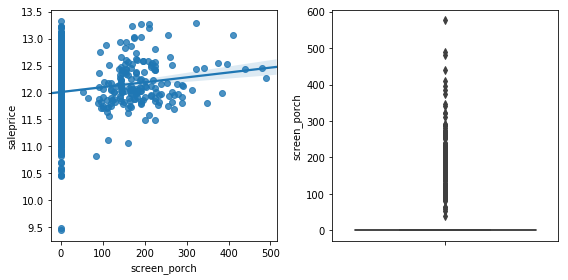

In [675]:
scatter_box(comb_dum.screen_porch, comb_dum.saleprice)

In [676]:
#Exclude screen_porch > 550
comb_dum=comb_dum[comb_dum.screen_porch<550]

saleprice vs. exter_qual

sample lengh: 2918   and skew: 0.7683109211834466


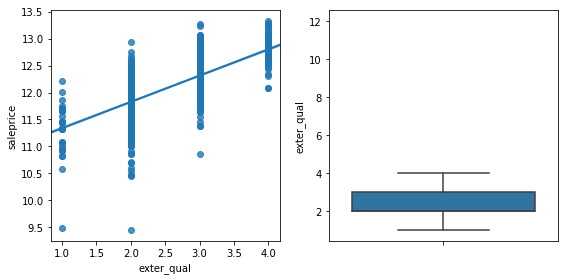

In [677]:
scatter_box(comb_dum.exter_qual, comb_dum.saleprice)

saleprice vs. exter_cond

sample lengh: 2918   and skew: 1.315491338556648


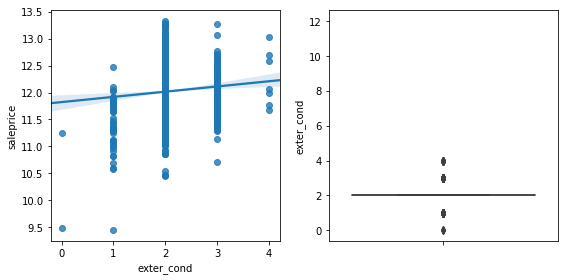

In [678]:
scatter_box(comb_dum.exter_cond, comb_dum.saleprice)

saleprice vs. heating_qc

sample lengh: 2918   and skew: -0.5436343180993581


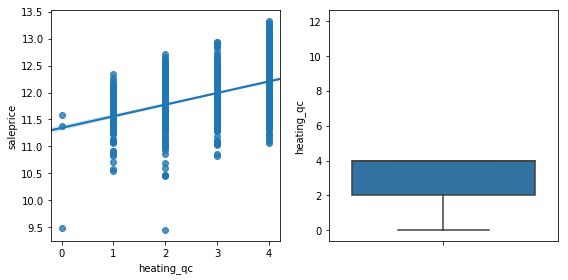

In [679]:
scatter_box(comb_dum.heating_qc, comb_dum.saleprice)

saleprice vs. electrical

sample lengh: 2918   and skew: -4.201908140503594


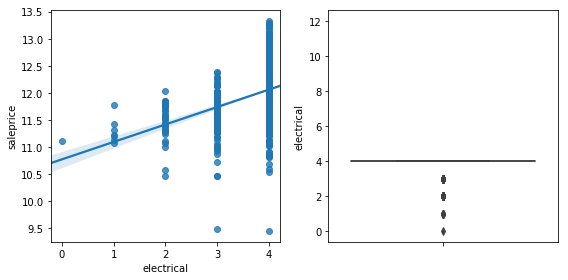

In [680]:
scatter_box(comb_dum.electrical, comb_dum.saleprice)

saleprice vs. mas_vnr_area

sample lengh: 2918   and skew: 2.572678781953731


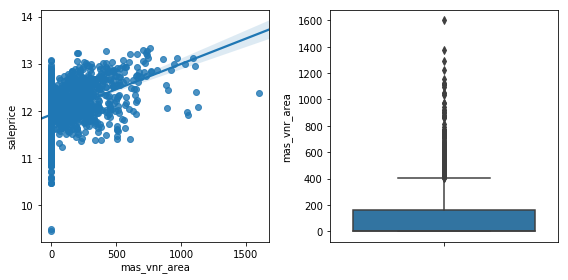

In [681]:
scatter_box(comb_dum.mas_vnr_area, comb_dum.saleprice)

In [682]:
#Exclude mas_vnr_area > 1550
comb_dum=comb_dum[comb_dum.mas_vnr_area<1500]

saleprice vs. bsmtfin_sf_1

sample lengh: 2917   and skew: 0.8227267220254774


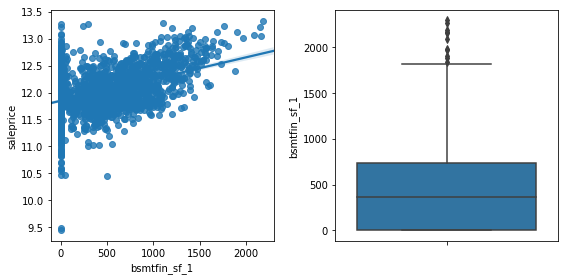

In [683]:
scatter_box(comb_dum.bsmtfin_sf_1, comb_dum.saleprice)

saleprice vs. bsmtfin_sf_2

sample lengh: 2917   and skew: 4.128058720003511


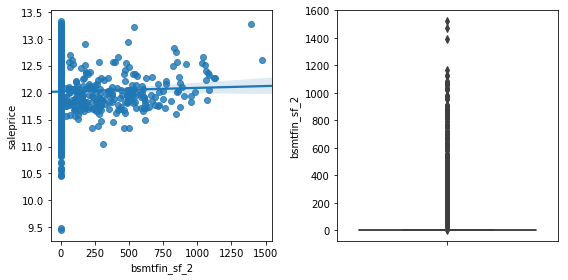

In [684]:
scatter_box(comb_dum.bsmtfin_sf_2, comb_dum.saleprice)

In [685]:
#Exclude bsmtfin_sf_2 > 1250
comb_dum=comb_dum[comb_dum.bsmtfin_sf_2<1250]

saleprice vs. bsmt_unf_sf

sample lengh: 2914   and skew: 0.9261844248449301


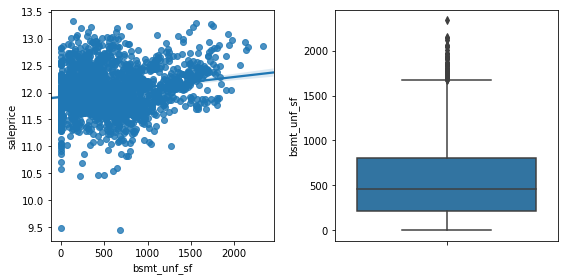

In [686]:
scatter_box(comb_dum.bsmt_unf_sf, comb_dum.saleprice)

saleprice vs. total_bsmt_sf

sample lengh: 2914   and skew: 0.4015022969799625


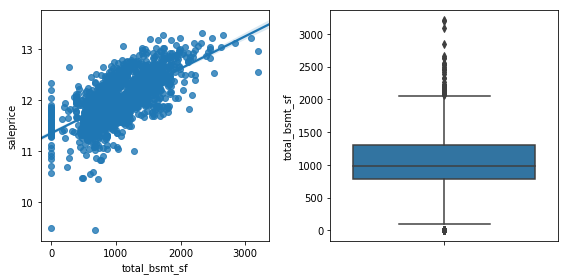

In [687]:
scatter_box(comb_dum.total_bsmt_sf, comb_dum.saleprice)

In [688]:
#Exclude total_bsmt_sf > 4000
comb_dum=comb_dum[comb_dum.total_bsmt_sf<4000]

saleprice vs. year_built

sample lengh: 2914   and skew: -0.6005174254730364


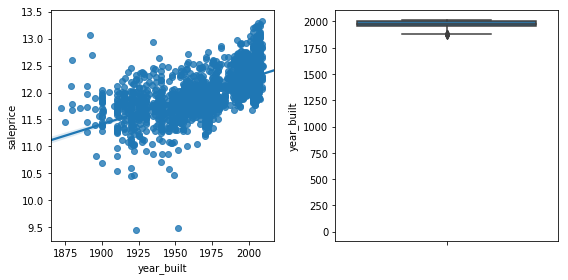

In [689]:
scatter_box(comb_dum.year_built, comb_dum.saleprice)

saleprice vs. yr_sold

sample lengh: 2914   and skew: 0.13273642183891096


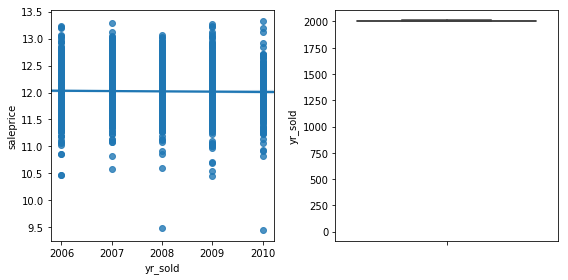

In [690]:
scatter_box(comb_dum.yr_sold, comb_dum.saleprice)

saleprice vs. garage_area

sample lengh: 2914   and skew: 0.21278503464579943


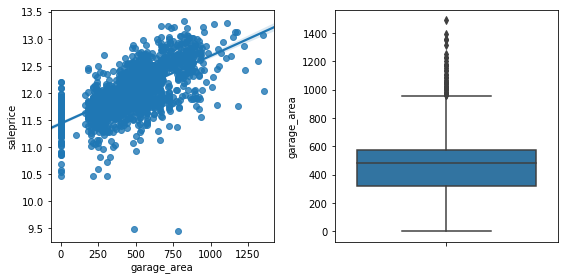

In [691]:
scatter_box(comb_dum.garage_area, comb_dum.saleprice)

saleprice vs. garage_area

sample lengh: 2914   and skew: -0.4480967080836636


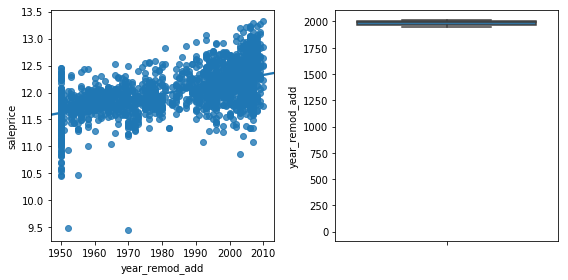

In [692]:
scatter_box(comb_dum['year_remod_add'], comb_dum.saleprice)

In [693]:
#Additional Adjustments
comb_dum_int = comb_dum.select_dtypes(include = int)
comb_dum_flt1 = comb_dum_int.astype(float)
comb_dum_flt = comb_dum.select_dtypes(include = float)
comb_dum_num = pd.concat([comb_dum_flt1, comb_dum_flt], sort=False, axis=1)

### Conduct exploratory data analysis on TRAIN data set. 

Create Heatmap:

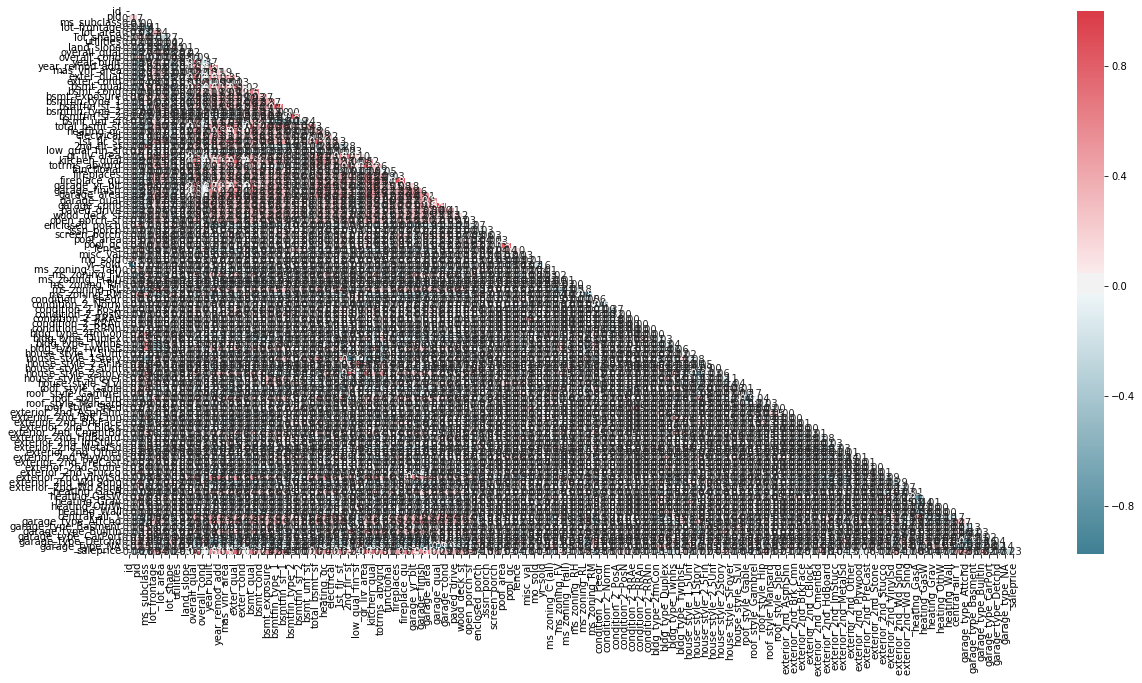

In [694]:
def getDF(data_url, columns):
    #retrieve data from url, create dataframe, return it
    data = pd.read_csv(final, names=columns)
    return data

def heatMap(df, mirror):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        plt.xticks(range(len(corr.columns)), corr.columns);
        plt.yticks(range(len(corr.columns)), corr.columns)
    else:
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        plt.xticks(range(len(corr.columns)), corr.columns);
        plt.yticks(range(len(corr.columns)), corr.columns)

        plt.show()


heatMap(comb_dum, False)
    

Feature Selection:

The following columns will be dropped due to:

- avoiding multicollinearity  in our model 
- data with negligible correlation with our target
- no added value to our model

In [695]:
#multicollinearity
comb_dum.drop('1st_flr_sf', axis=1, inplace=True)
comb_dum.drop('2nd_flr_sf', axis=1, inplace=True)
# total_bsmt_sf can explain saleprice better
comb_dum.drop('totrms_abvgrd', axis=1, inplace=True) # gr_liv_area can explain saleprice better
comb_dum.drop('exter_qual', axis=1, inplace=True) #overall_qual can explain saleprice better
#garage_area shows the total square feet of a particular garage


In [696]:
# data with negligible correlation
comb_dum.drop('pid', axis=1, inplace=True)
comb_dum.drop('utilities', axis=1, inplace=True)
comb_dum.drop('land_slope', axis=1, inplace=True)
comb_dum.drop('functional', axis=1, inplace=True) 
comb_dum.drop('overall_cond', axis=1, inplace=True)
comb_dum.drop('exter_cond', axis=1, inplace=True)
comb_dum.drop('low_qual_fin_sf', axis=1, inplace=True)
comb_dum.drop('misc_val', axis=1, inplace=True)
comb_dum.drop('mo_sold', axis=1, inplace=True) 
comb_dum.drop('fence', axis=1, inplace=True) 


In [697]:
#no value added
comb_dum.drop('bsmtfin_sf_1', axis=1, inplace=True)
comb_dum.drop('bsmtfin_sf_2', axis=1, inplace=True) 
comb_dum.drop('bsmt_unf_sf', axis=1, inplace=True) 
comb_dum.drop('alley', axis=1, inplace=True) 
comb_dum.drop('neighborhood', axis=1, inplace=True)
comb_dum.drop('garage_yr_blt', axis=1, inplace=True) 

comb_dum.drop('misc_feature', axis=1, inplace=True) 
comb_dum.drop('street', axis=1, inplace=True) 
comb_dum.drop('land_contour', axis=1, inplace=True) 
comb_dum.drop('lot_config', axis=1, inplace=True) 

comb_dum.drop('condition_1', axis=1, inplace=True) 
comb_dum.drop('exterior_1st', axis=1, inplace=True) 

comb_dum.drop('mas_vnr_type', axis=1, inplace=True) 
comb_dum.drop('foundation', axis=1, inplace=True) 
comb_dum.drop('roof_matl', axis=1, inplace=True) 


Feature Enhancement

In [698]:
# these will help to determine whether age of house will affect sale price
comb_dum['prop_age'] = comb_dum['yr_sold'] - comb_dum['year_built']
comb_dum.drop('yr_sold', axis=1, inplace=True) 
comb_dum.drop('year_built', axis=1, inplace=True) 


In [699]:
# these will determine if the pool feature will affect sale price
comb_dum['pool'] = comb_dum['pool_area'] * comb_dum['pool_qc']
comb_dum.drop('pool_area', axis=1, inplace=True) 
comb_dum.drop('pool_qc', axis=1, inplace=True) 


In [700]:
# these will determine if the basement quality and condition will affect sale price
comb_dum['bsmt'] = comb_dum['bsmt_qual'] * comb_dum['bsmt_cond']
comb_dum.drop('bsmt_qual', axis=1, inplace=True) 
comb_dum.drop('bsmt_cond', axis=1, inplace=True) 


In [701]:
# these will determine if the fireplace will affect sale price
comb_dum['fireplace'] = comb_dum['fireplaces'] * comb_dum['fireplace_qu']
comb_dum.drop('fireplaces', axis=1, inplace=True) 
comb_dum.drop('fireplace_qu', axis=1, inplace=True) 


In [702]:
# these will determine if the garage will affect sale price
comb_dum['garage_aes'] = comb_dum['garage_finish'] * comb_dum['garage_qual'] * comb_dum['garage_cond']
comb_dum.drop('garage_finish', axis=1, inplace=True)
comb_dum.drop('garage_cond', axis=1, inplace=True)
comb_dum.drop('garage_qual', axis=1, inplace=True) 

In [703]:
comb_dum.describe().T

count           mean           std      min        25%       50%        75%       max
id                    2914.0    1464.668497    846.940186      1.0     732.25    1462.5    2199.75    2930.0
ms_subclass           2914.0      57.455388     42.718539     20.0      20.00      50.0      70.00     190.0
lot_frontage          2914.0      68.711050     20.200562     21.0      60.00      68.0      78.00     200.0
lot_area              2914.0   10075.787577   7753.423331   1300.0    7427.75    9399.5   11500.00  215245.0
lot_shape             2914.0       2.600549      0.567769      0.0       2.00       3.0       3.00       3.0
overall_qual          2914.0       6.086822      1.402885      1.0       5.00       6.0       7.00      10.0
year_remod_add        2914.0    1984.231640     20.875488   1950.0    1965.00    1993.0    2004.00    2010.0
mas_vnr_area          2914.0      99.216884    172.926080      0.0       0.00       0.0     162.00    1378.0
bsmt_exposure         2914.0       1.622855      1.069908      0.0       1.00       1.0       2.00       4.0
bsmtfin_type_1        2914.0       3.547358      2.115281      0.0       1.00       4.0       6.00       6.0
bsmtfin_type_2        2914.0       1.272135      0.948592      0.0       1.00       1.0       1.00       6.0
total_bsmt_sf         2914.0    1045.841455    420.885376      0.0     792.00     988.0    1296.75    3206.0
heating_qc            2914.0       3.147563      0.958197      0.0       2.00       4.0       4.00       4.0
electrical            2913.0       3.891864      0.389128      0.0       4.00       4.0       4.00       4.0
gr_liv_area           2914.0    1491.163349    482.675501    334.0    1124.25    1440.0    1738.00    3672.0
kitchen_qual          2914.0       2.506863      0.660380      0.0       2.00       2.0       3.00       4.0
garage_area           2914.0     471.290323    214.013824      0.0     319.25     478.5     576.00    1488.0
paved_drive           2914.0       1.830817      0.537503      0.0       2.00       2.0       2.00       2.0
wood_deck_sf          2914.0      92.771791    122.895451      0.0       0.00       0.0     168.00     857.0
open_porch_sf         2914.0      47.053535     66.331377      0.0       0.00      26.5      70.00     742.0
enclosed_porch        2914.0      22.642416     61.159961      0.0       0.00       0.0       0.00     584.0
3ssn_porch            2914.0       2.432395     23.405331      0.0       0.00       0.0       0.00     407.0
screen_porch          2914.0      15.752231     55.044722      0.0       0.00       0.0       0.00     490.0
ms_zoning_C (all)     2914.0       0.008579      0.092242      0.0       0.00       0.0       0.00       1.0
ms_zoning_FV          2914.0       0.047358      0.212439      0.0       0.00       0.0       0.00       1.0
ms_zoning_I (all)     2914.0       0.000686      0.026194      0.0       0.00       0.0       0.00       1.0
ms_zoning_RH          2914.0       0.009266      0.095828      0.0       0.00       0.0       0.00       1.0
ms_zoning_RL          2914.0       0.774880      0.417733      0.0       1.00       1.0       1.00       1.0
ms_zoning_RM          2914.0       0.158545      0.365314      0.0       0.00       0.0       0.00       1.0
condition_2_Feedr     2914.0       0.004461      0.066655      0.0       0.00       0.0       0.00       1.0
condition_2_Norm      2914.0       0.990048      0.099279      0.0       1.00       1.0       1.00       1.0
condition_2_PosA      2914.0       0.001373      0.037031      0.0       0.00       0.0       0.00       1.0
condition_2_PosN      2914.0       0.001030      0.032075      0.0       0.00       0.0       0.00       1.0
condition_2_RRAe      2914.0       0.000343      0.018525      0.0       0.00       0.0       0.00       1.0
condition_2_RRAn      2914.0       0.000343      0.018525      0.0       0.00       0.0       0.00       1.0
condition_2_RRNn      2914.0       0.000686      0.026194      0.0       0.00       0.0       0.00 

In [704]:
def dummys2(df):
    df = pd.get_dummies(df, columns=['ms_subclass'
                                     ,'bsmtfin_type_1'
                                     ,'bsmtfin_type_2'
                                     ,'sale_type'
                                    ], drop_first=True)
    return df

        
comb_final = dummys2(comb_dum)

In [705]:
comb_final.to_csv('../datasets/comb_final.csv' ,index=False)

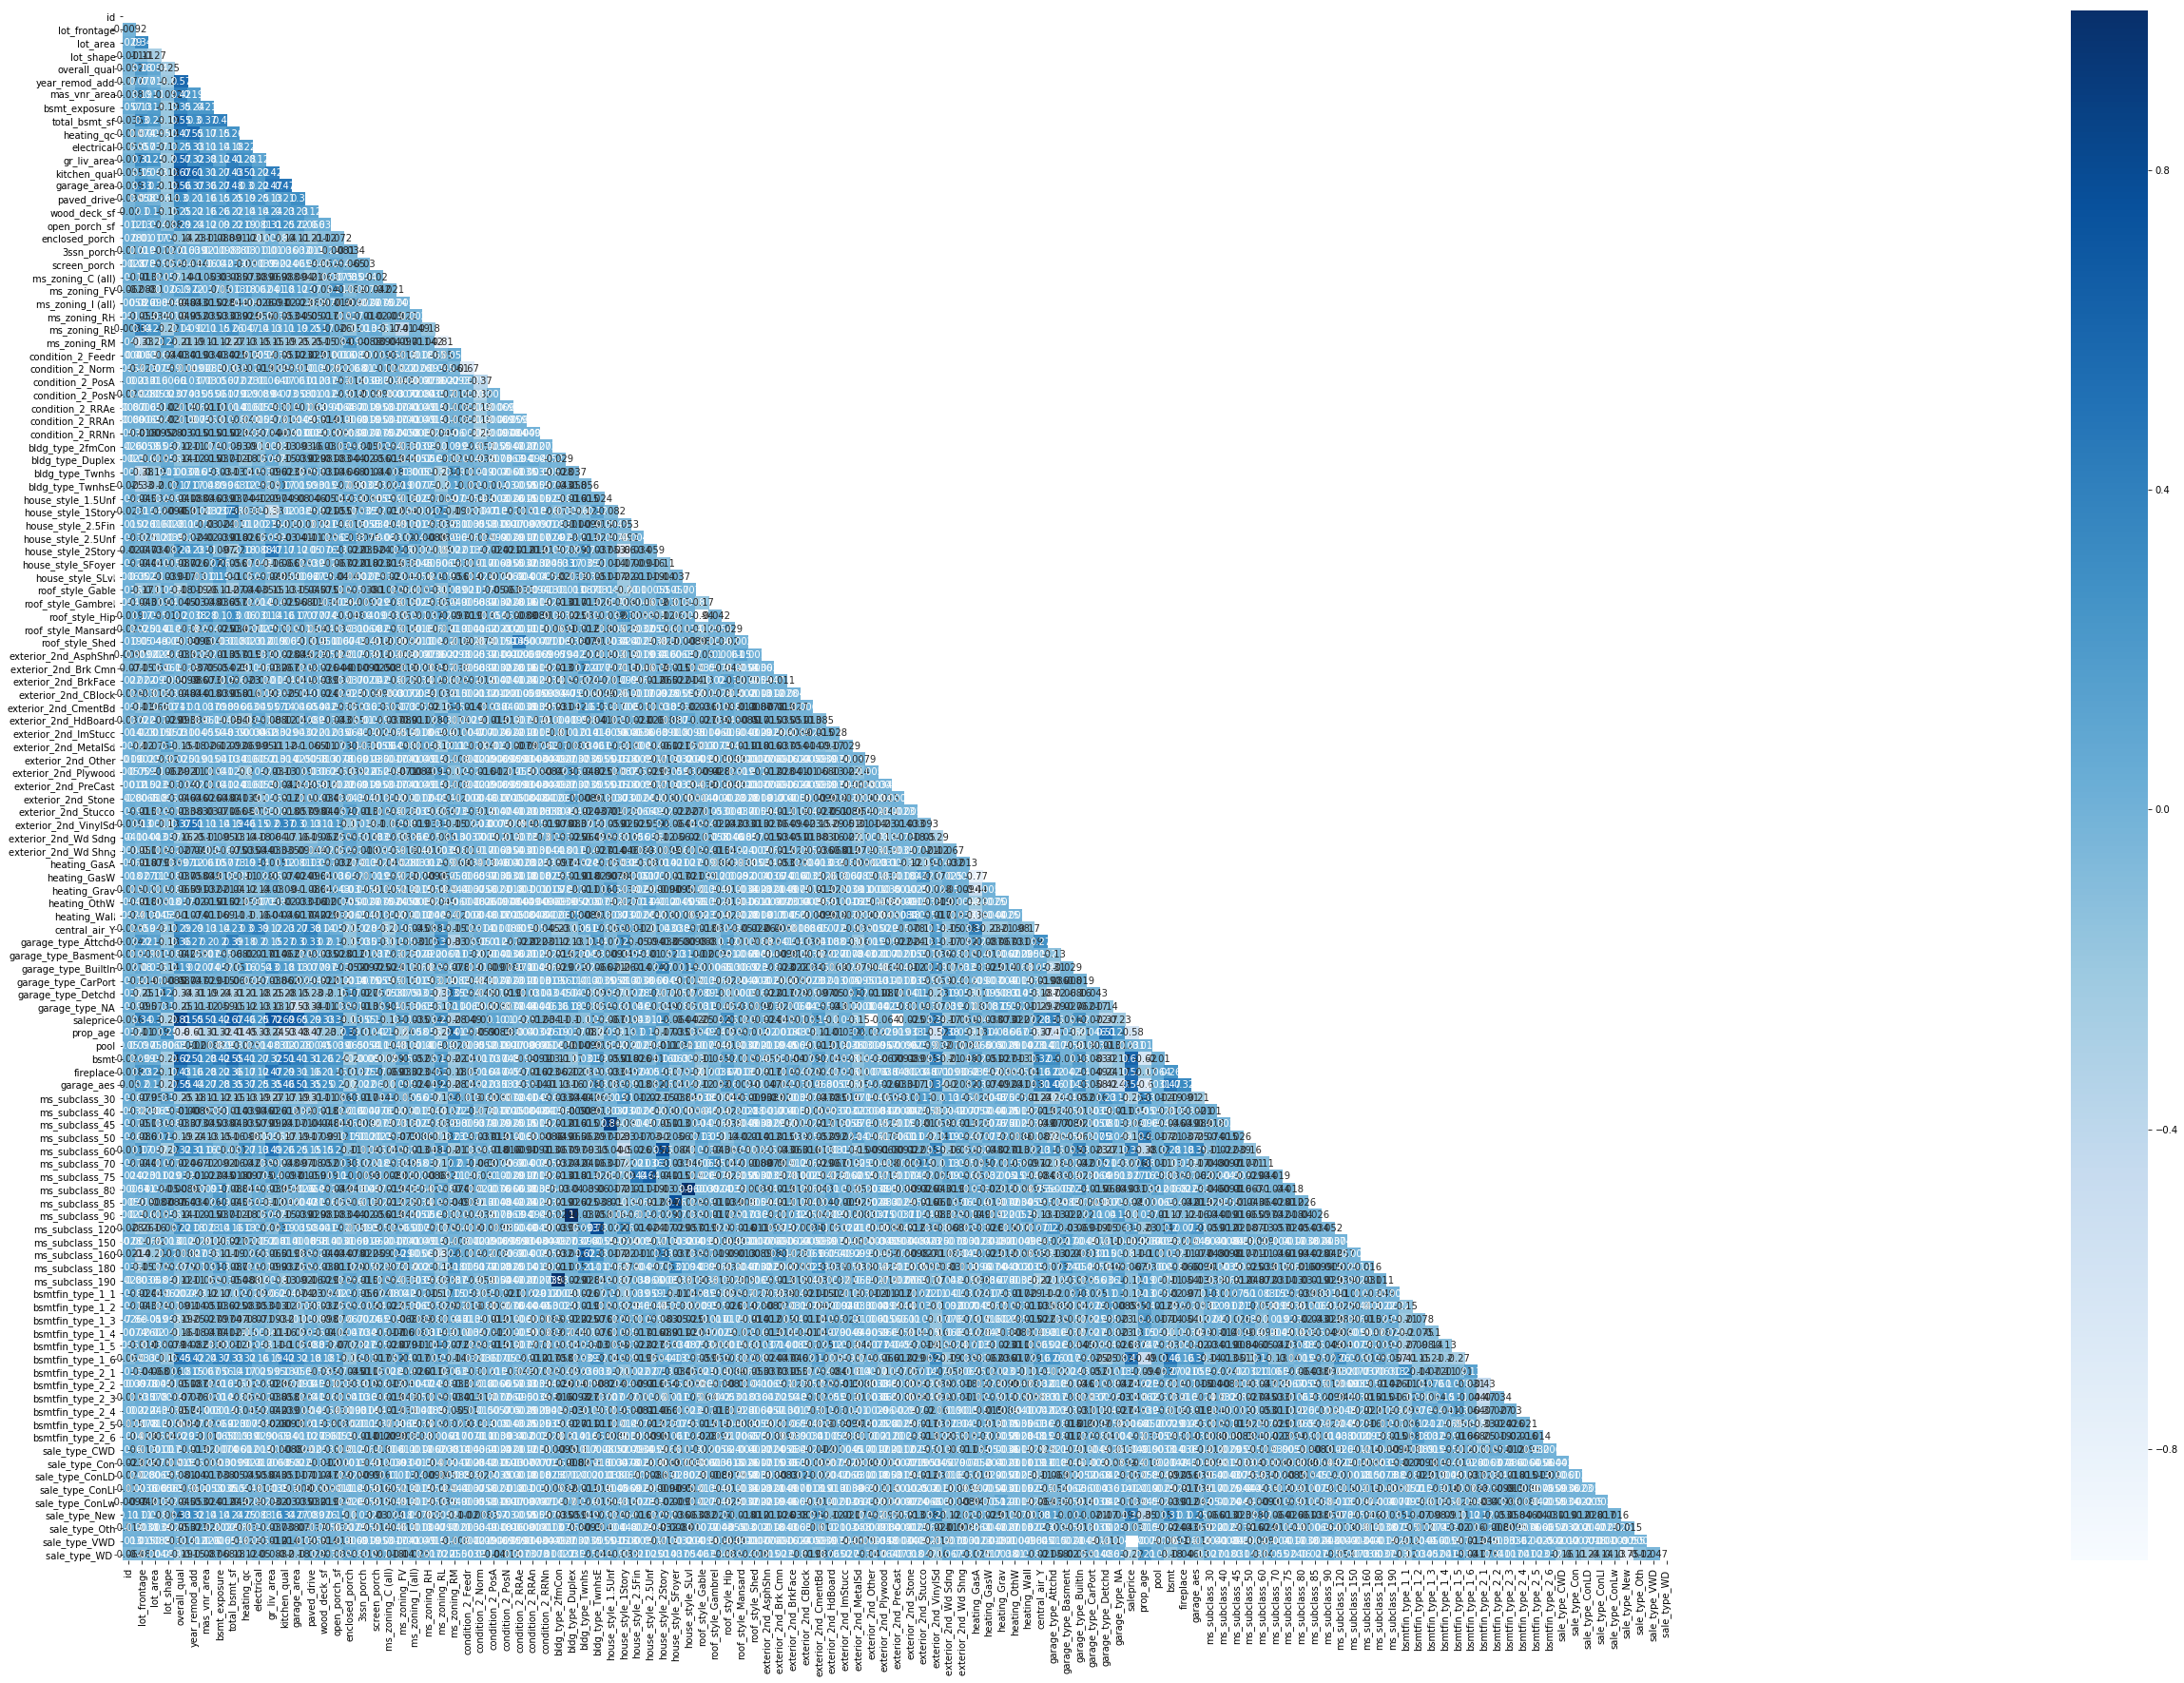

In [706]:
plt.figure(figsize=(150,30))
mask = np.zeros_like(comb_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(comb_final.corr(), mask=mask, annot=True, square=True, cmap='Blues')

In [708]:
comb_final.drop('pool', axis=1, inplace=True) 

In [709]:
comb_final.describe().T

count           mean           std      min        25%       50%        75%       max
id                    2914.0    1464.668497    846.940186      1.0     732.25    1462.5    2199.75    2930.0
lot_frontage          2914.0      68.711050     20.200562     21.0      60.00      68.0      78.00     200.0
lot_area              2914.0   10075.787577   7753.423331   1300.0    7427.75    9399.5   11500.00  215245.0
lot_shape             2914.0       2.600549      0.567769      0.0       2.00       3.0       3.00       3.0
overall_qual          2914.0       6.086822      1.402885      1.0       5.00       6.0       7.00      10.0
year_remod_add        2914.0    1984.231640     20.875488   1950.0    1965.00    1993.0    2004.00    2010.0
mas_vnr_area          2914.0      99.216884    172.926080      0.0       0.00       0.0     162.00    1378.0
bsmt_exposure         2914.0       1.622855      1.069908      0.0       1.00       1.0       2.00       4.0
total_bsmt_sf         2914.0    1045.841455    420.885376      0.0     792.00     988.0    1296.75    3206.0
heating_qc            2914.0       3.147563      0.958197      0.0       2.00       4.0       4.00       4.0
electrical            2913.0       3.891864      0.389128      0.0       4.00       4.0       4.00       4.0
gr_liv_area           2914.0    1491.163349    482.675501    334.0    1124.25    1440.0    1738.00    3672.0
kitchen_qual          2914.0       2.506863      0.660380      0.0       2.00       2.0       3.00       4.0
garage_area           2914.0     471.290323    214.013824      0.0     319.25     478.5     576.00    1488.0
paved_drive           2914.0       1.830817      0.537503      0.0       2.00       2.0       2.00       2.0
wood_deck_sf          2914.0      92.771791    122.895451      0.0       0.00       0.0     168.00     857.0
open_porch_sf         2914.0      47.053535     66.331377      0.0       0.00      26.5      70.00     742.0
enclosed_porch        2914.0      22.642416     61.159961      0.0       0.00       0.0       0.00     584.0
3ssn_porch            2914.0       2.432395     23.405331      0.0       0.00       0.0       0.00     407.0
screen_porch          2914.0      15.752231     55.044722      0.0       0.00       0.0       0.00     490.0
ms_zoning_C (all)     2914.0       0.008579      0.092242      0.0       0.00       0.0       0.00       1.0
ms_zoning_FV          2914.0       0.047358      0.212439      0.0       0.00       0.0       0.00       1.0
ms_zoning_I (all)     2914.0       0.000686      0.026194      0.0       0.00       0.0       0.00       1.0
ms_zoning_RH          2914.0       0.009266      0.095828      0.0       0.00       0.0       0.00       1.0
ms_zoning_RL          2914.0       0.774880      0.417733      0.0       1.00       1.0       1.00       1.0
ms_zoning_RM          2914.0       0.158545      0.365314      0.0       0.00       0.0       0.00       1.0
condition_2_Feedr     2914.0       0.004461      0.066655      0.0       0.00       0.0       0.00       1.0
condition_2_Norm      2914.0       0.990048      0.099279      0.0       1.00       1.0       1.00       1.0
condition_2_PosA      2914.0       0.001373      0.037031      0.0       0.00       0.0       0.00       1.0
condition_2_PosN      2914.0       0.001030      0.032075      0.0       0.00       0.0       0.00       1.0
condition_2_RRAe      2914.0       0.000343      0.018525      0.0       0.00       0.0       0.00       1.0
condition_2_RRAn      2914.0       0.000343      0.018525      0.0       0.00       0.0       0.00       1.0
condition_2_RRNn      2914.0       0.000686      0.026194      0.0       0.00       0.0       0.00       1.0
bldg_type_2fmCon      2914.0       0.021277      0.144330      0.0       0.00       0.0       0.00       1.0
bldg_type_Duplex      2914.0       0.037406      0.189786      0.0       0.00       0.0       0.00       1.0
bldg_type_Twnhs       2914.0       0.034660      0.182949      0.0       0.00       0.0       0.00 

In [710]:
test_final = comb_final[comb_final.saleprice.isnull()]
test_final = comb_final.drop(columns='saleprice', axis=1)

In [711]:
train_final = comb_final.dropna()
train_final

id  lot_frontage  lot_area  lot_shape  overall_qual  year_remod_add  mas_vnr_area  bsmt_exposure  total_bsmt_sf  heating_qc  electrical  gr_liv_area  kitchen_qual  garage_area  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  condition_2_Feedr  condition_2_Norm  condition_2_PosA  condition_2_PosN  condition_2_RRAe  condition_2_RRAn  condition_2_RRNn  \
0      109            68     13517          2             6            2005         289.0              1          725.0           4         4.0         1479             3        475.0            2             0             44               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
1      544            43     11492          2             7            1997         132.0              1          913.0           4         4.0         2122             3        559.0            2             0             74               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
2      153            68      7922          3             5            2007           0.0              1         1057.0           2         4.0         1057             3        246.0            2             0             52               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
3      318            73      9802          3             5            2007           0.0              1          384.0           3         4.0         1444             2        400.0            2           100              0               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
4      255            82     14235          2             6            1993           0.0              1          676.0           2         4.0         1445             2        484.0            0             0             59               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
5      138           137     16492          2             6            2002           0.0              1         1517.0           4         4.0         1888             3        578.0            2             0              0               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0   
6     2827            35      3675          3             6            2006          82.0              4          547.0           3         4.0         1072             2        525.0            2             0             44               0           0             0                  0             0                  0             0             0             1                  0                 1                 0                 0                 0                 0                 0   
7      145            68     12160          2             5            1

Scaling

In [712]:
train_final.drop(columns='id', axis=1, inplace=True)

C:\Users\FCG\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [713]:
train_final.head()

lot_frontage  lot_area  lot_shape  overall_qual  year_remod_add  mas_vnr_area  bsmt_exposure  total_bsmt_sf  heating_qc  electrical  gr_liv_area  kitchen_qual  garage_area  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  condition_2_Feedr  condition_2_Norm  condition_2_PosA  condition_2_PosN  condition_2_RRAe  condition_2_RRAn  condition_2_RRNn  bldg_type_2fmCon  \
0            68     13517          2             6            2005         289.0              1          725.0           4         4.0         1479             3        475.0            2             0             44               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0                 0   
1            43     11492          2             7            1997         132.0              1          913.0           4         4.0         2122             3        559.0            2             0             74               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0                 0   
2            68      7922          3             5            2007           0.0              1         1057.0           2         4.0         1057             3        246.0            2             0             52               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0                 0   
3            73      9802          3             5            2007           0.0              1          384.0           3         4.0         1444             2        400.0            2           100              0               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0                 0   
4            82     14235          2             6            1993           0.0              1          676.0           2         4.0         1445             2        484.0            0             0             59               0           0             0                  0             0                  0             0             1             0                  0                 1                 0                 0                 0                 0                 0                 0   

   bldg_type_Duplex  bldg_type_Twnhs  bldg_type_TwnhsE  house_style_1.5Unf  house_style_1Story  house_style_2.5Fin  house_style_2.5Unf  house_style_2Story  house_style_SFoyer  house_style_SLvl  roof_style_Gable  roof_style_Gambrel  roof_style_Hip  roof_style_Mansard  roof_style_Shed  exterior_2nd_AsphShn  exterior_2nd_Brk Cmn  exterior_2nd_BrkFace  exterior_2nd_CBlock  exterior_2nd_CmentBd  exterior_2nd_HdBoard  exterior_2nd_ImStucc  exterior_2nd_MetalSd  exterior_2nd_Other  \
0                 0                0                 0                   0                   0                   0                   0                   1                   0                 0                 1                   0               0                   0                0                     0                     0                     0                    0                     0                     0                     0                     0                   0   
1                 0             

In [714]:
features = [col for col in train_final if col != 'saleprice']
X_overfit= train_final[features]
y = train_final['saleprice']

In [715]:
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, random_state=42)

In [716]:
ss = StandardScaler() 
X_train_sc = ss.fit_transform(X_train) 
X_test_sc = ss.transform(X_test)
pd.DataFrame(X_train_sc, columns=features).head()

C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\FCG\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\FCG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


lot_frontage  lot_area  lot_shape  overall_qual  year_remod_add  mas_vnr_area  bsmt_exposure  total_bsmt_sf  heating_qc  electrical  gr_liv_area  kitchen_qual  garage_area  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  condition_2_Feedr  condition_2_Norm  condition_2_PosA  condition_2_PosN  condition_2_RRAe  condition_2_RRAn  condition_2_RRNn  bldg_type_2fmCon  \
0     -0.054035  0.481737  -1.064102     -1.489160       -1.146659     -0.572751      -0.570524       0.096284   -1.202853    0.278923    -0.823954     -0.774743    -0.750749     0.315788      2.099448      -0.711995       -0.375118   -0.095277     -0.281915          -0.096098     -0.231774          -0.025574     -0.085098      0.523391     -0.413061            -0.0725          0.117968         -0.044324         -0.036179               0.0         -0.025574         -0.036179         -0.153008   
1     -0.054035  0.374941  -1.064102      1.324566        0.508826      2.211782       1.306685       0.425793    0.862652    0.278923     2.135785      0.729517     1.283647     0.315788      0.787543       0.615887       -0.375118   -0.095277     -0.281915          -0.096098     -0.231774          -0.025574     -0.085098      0.523391     -0.413061            -0.0725          0.117968         -0.044324         -0.036179               0.0         -0.025574         -0.036179         -0.153008   
2     -0.461296 -0.009262   0.726960     -0.082297       -1.619655     -0.572751      -0.570524      -0.650914   -1.202853    0.278923    -0.002157     -0.774743    -1.084408     0.315788      1.938478      -0.711995       -0.375118   -0.095277     -0.281915          -0.096098     -0.231774          -0.025574     -0.085098      0.523391     -0.413061            -0.0725          0.117968         -0.044324         -0.036179               0.0         -0.025574         -0.036179         -0.153008   
3     -0.563111 -0.662349   0.726960      0.621135       -0.673664     -0.572751      -0.570524      -0.804066   -0.170100    0.278923    -0.131025     -0.774743     0.472669     0.315788      1.367035      -0.711995        1.043077   -0.095277     -0.281915          -0.096098     -0.231774          -0.025574     -0.085098     -1.910617      2.420947            -0.0725          0.117968         -0.044324         -0.036179               0.0         -0.025574         -0.036179         -0.153008   
4     -0.054035  0.929942  -2.855164      1.324566        0.887223      0.861343       2.245289       1.669576    0.862652    0.278923     0.625283      0.729517     1.116817     0.315788      0.707058      -0.177789       -0.375118   -0.095277     -0.281915          -0.096098     -0.231774          -0.025574     -0.085098      0.523391     -0.413061            -0.0725          0.117968         -0.044324         -0.036179               0.0         -0.025574         -0.036179         -0.153008   

   bldg_type_Duplex  bldg_type_Twnhs  bldg_type_TwnhsE  house_style_1.5Unf  house_style_1Story  house_style_2.5Fin  house_style_2.5Unf  house_style_2Story  house_style_SFoyer  house_style_SLvl  roof_style_Gable  roof_style_Gambrel  roof_style_Hip  roof_style_Mansard  roof_style_Shed  exterior_2nd_AsphShn  exterior_2nd_Brk Cmn  exterior_2nd_BrkFace  exterior_2nd_CBlock  exterior_2nd_CmentBd  exterior_2nd_HdBoard  exterior_2nd_ImStucc  exterior_2nd_MetalSd  exterior_2nd_Other  \
0         -0.194915        -0.168005         -0.293047             -0.0725            0.947767           -0.051198           -0.085098           -0.627250           -0.159591         -0.214001          0.521364           -0.076923       -0.493865           -0.067795        -0.036179             -0.025574             -0.096098             -0.131481            -0.036179             -0.223837             -0.374285             -0.062746             -0.431331                 0.0   
1         -0.194915        -0.16

#### LR baseline

In [718]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
cross_val_score(lr, X_train_sc, y_train, cv=3) 

array([-9.25267579e+23, -1.65496828e+21, -4.84326162e+22])

In [719]:
print(X_train_sc.shape)
print(X_test_sc.shape)
print(y_test.shape)

(1530, 116)
(511, 116)
(511,)


In [720]:
print('lr train r^2 : ', lr.score(X_train_sc, y_train))
print('lr test r^2 : ', lr.score(X_test_sc, y_test))

lr train r^2 :  0.8967950601489701
lr test r^2 :  -3.799604993288123e+19


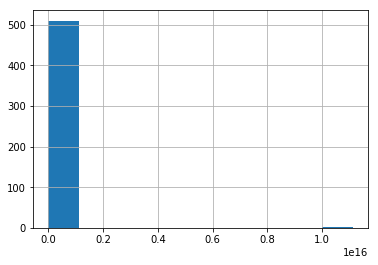

In [721]:
predictions = lr.predict(X_test_sc)
lr_res = y_test - predictions
lr_res.hist()

lasso cross_val_score 0.8762429771728408
lasso train r2 = 0.8969549255307999
lasso test r2 = 0.8851848561197941


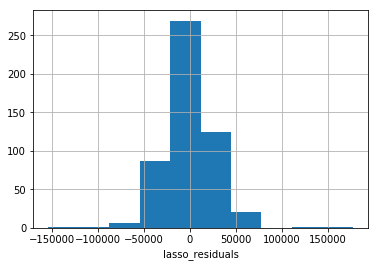

In [722]:

#lasso = LassoCV(alphas=l_alphas, cv=3)
#cross_val_score(lasso, X_train_sc, y_train, cv=3)
#lasso.fit(X_train_sc, y_train)

lasso = LassoCV(cv=3)
lasso_overfit = LassoCV(max_iter=10000)
print("lasso cross_val_score", cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())

lasso.fit(X_train_sc, y_train)

print('lasso train r2 =', lasso.score(X_train_sc, y_train))

print('lasso test r2 =', lasso.score(X_test_sc, y_test))

lasso_preds = lasso.predict(X_test_sc)

lasso_residuals = y_test - lasso_preds

lasso_residuals.hist()
plt.xlabel('lasso_residuals');

In [723]:

# find features with highest coefficients from Lasso

lasso_features = pd.DataFrame(X_train.columns, columns=['feature'])
lasso_features['coef'] = lasso.coef_
lasso_features['abs_coef'] = np.abs(lasso.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False).head(20)

feature          coef      abs_coef
10            gr_liv_area  23287.084741  23287.084741
3            overall_qual  16526.509879  16526.509879
7           total_bsmt_sf   8997.076567   8997.076567
95       bsmtfin_type_1_1  -8923.661864   8923.661864
112         sale_type_New   8087.694806   8087.694806
11           kitchen_qual   8074.199087   8074.199087
5            mas_vnr_area   6238.878327   6238.878327
1                lot_area   6162.712365   6162.712365
12            garage_area   5921.091626   5921.091626
6           bsmt_exposure   5053.316676   5053.316676
78              fireplace   4542.109220   4542.109220
75         garage_type_NA   3855.385142   3855.385142
77                   bsmt   3566.543525   3566.543525
97       bsmtfin_type_1_3  -3506.596019   3506.596019
101      bsmtfin_type_2_1  -3376.488111   3376.488111
4          year_remod_add   3316.170752   3316.170752
76               prop_age  -3308.353412   3308.353412
18           screen_porch   3244.971678   3244.971678
52   exterior_2nd_CmentBd   3113.459719   3113.459719
103      bsmtfin_type_2_3  -3085.282276   3085.282276

In [727]:
hicoef_feat = ['gr_liv_area', 'overall_qual','bsmtfin_type_1_1','sale_type_New'  ,'kitchen_qual',
              'mas_vnr_area','lot_area','garage_area','bsmt_exposure','fireplace','garage_type_NA','bsmt',
              'bsmtfin_type_2_1','year_remod_add','bsmtfin_type_1_3','prop_age','screen_porch','exterior_2nd_CmentBd'
              ,'bsmtfin_type_2_3']

In [728]:
X = train_final[hicoef_feat]

lasso cross_val_score 0.8762429771728408
lasso train r2 = 0.8969549255307999
lasso test r2 = 0.8851848561197941


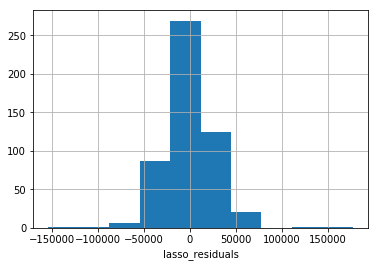

In [729]:
lasso = LassoCV(cv=3)
lasso_overfit = LassoCV(max_iter=10000)
print("lasso cross_val_score", cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())

lasso.fit(X_train_sc, y_train)

print('lasso train r2 =', lasso.score(X_train_sc, y_train))

print('lasso test r2 =', lasso.score(X_test_sc, y_test))

lasso_preds = lasso.predict(X_test_sc)

lasso_residuals = y_test - lasso_preds

lasso_residuals.hist()
plt.xlabel('lasso_residuals');

 0.875936447913047
lasso train r2 = 0.897024279191241
lasso test r2 = 0.8851364070676